# Stage-1 procesing on hp3ddata

The report should contain the following:
1. Plot the shifted logarithm of the histogram counts and the threshold position, just so the user can quickly figure out whether all the threshold are correctly identified at one glance of the diagram.
2. Plot xy, xz, and yz mip with the identified mass center overlayed on top of it. This also to help the user quickly check the mass centeres are identified reasonably.
3. Generate the trajectory of the mass center - this could be used to characterize the movement of this cell specifically


In [1]:
import sys
sys.path.append('/g/g92/yi10')
import llsmvis
from llsmvis.extensions import hp3d
from matplotlib import pyplot as plt
import matplotlib
from skimage import io
from scipy import ndimage
import numpy as np
import copy
from scipy.signal import argrelextrema
%load_ext autoreload
%autoreload 2

Loading BokehJS ...

In [2]:
# ticket information (the output files from the interactive trimming results, see E1 for details)
tpath='/g/g92/yi10/CroppingData'
thead='2021-09-24-cell3'  
tlist=hp3d.croproi3d.get_trimmed_tiff_list(tpath, thead)


In [3]:
d=hp3d.hp3ddata.HP3Ddata(fpath='./test2',dfnamehead='test2',initialize=False)

Try to create the following file path:
./test2
the file path exists
found the hdf5 file:
./test2/test2.hdf5
successfully opened the hp3d data object and the associated hdf5 file


In [4]:
tlist

['/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed/trimmed_stacks/Trimmed_cell3_Iter_0_ch0_stack0000_3nm_0000000msec_0012232384msecAbs.tif',
 '/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed/trimmed_stacks/Trimmed_cell3_Iter_0_ch0_stack0001_3nm_0031093msec_0012263477msecAbs.tif',
 '/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed/trimmed_stacks/Trimmed_cell3_Iter_0_ch0_stack0002_3nm_0062237msec_0012294621msecAbs.tif',
 '/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed/trimmed_stacks/Trimmed_cell3_Iter_0_ch0_stack0003_3nm_0093416msec_0012325800msecAbs.tif',
 '/p/lscratchh/yi10/llsm-data/2021-09-24-mCherryRAw264.7-condition1/focused-fast-scans/results_dsk/cell3_Iter_0_deskewed/trimmed_stacks/Trimmed_cell3_Iter_0

# This is to process all the time ponints
## uncomment when you want to redo the processing

d.process_all_time_points(tlist)

In [5]:
d.show_data_structure()

[D1] mass centers
[D2] threshold saddle point
[D3] threshold saddle point index
[D4] threshold upper bound
[D5] threshold upper bound index
[D6] threshold lower bound
[D7] threshold lower bound index
[D8] threshold cell peripheral lower bound
[G01] voxel value bin centers
[G02] voxel value histogram counts
[G03] stack XY mips before cropping
[G04] stack YZ mips before cropping
[G05] stack XZ mips before cropping
[G06] stack XY mips after cropping - saddle point to upper bound
[G07] stack YZ mips after cropping - saddle point to upper bound
[G08] stack XZ mips after cropping - saddle point to upper bound
[G09] stack XY mips after cropping - lower bound to saddle point
[G10] stack YZ mips after cropping - lower bound to saddle point
[G11] stack XZ mips after cropping - lower bound to saddle point
[G12] stack XY mips after cropping - zero to saddle point
[G13] stack YZ mips after cropping - zero to saddle point
[G14] stack XZ mips after cropping - zero to saddle point
[G15] stack XY mips 

0

# Inspect sass center trajectory

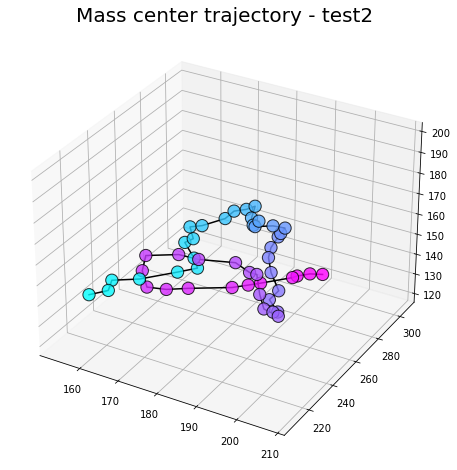

0

In [6]:
d.plot_mass_center_trajectory()

# Inspect threshold 

0

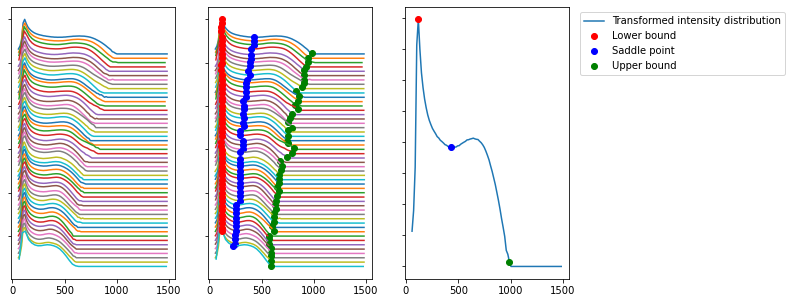

In [7]:
# hp3d.hp3ddata.inspect_threshold(hp3ddata_h=l2)
d.inspect_threshold()

# Inspect mass center on mips

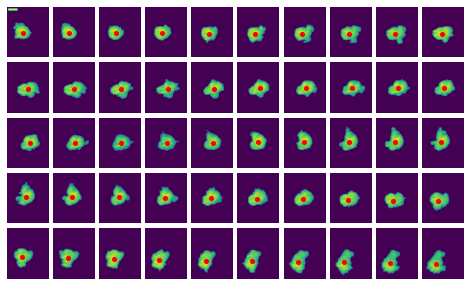

scale bars are 8 um


0

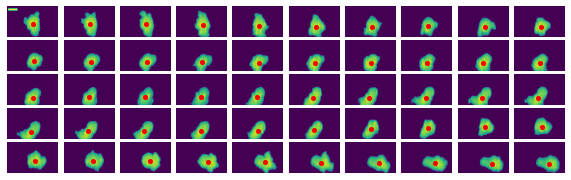

scale bars are 8 um


0

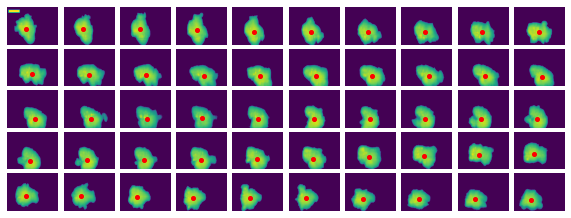

scale bars are 8 um


0

In [8]:
# hp3d.hp3ddata.check_mass_center_on_smip(l2,projp='YZ')
d.check_mass_center_on_smip(projp='XY')
d.check_mass_center_on_smip(projp='XZ')
d.check_mass_center_on_smip(projp='YZ')

# Make the snapshots color-coded in time


scale bars are 8 um
scale bars are 8 um
scale bars are 8 um


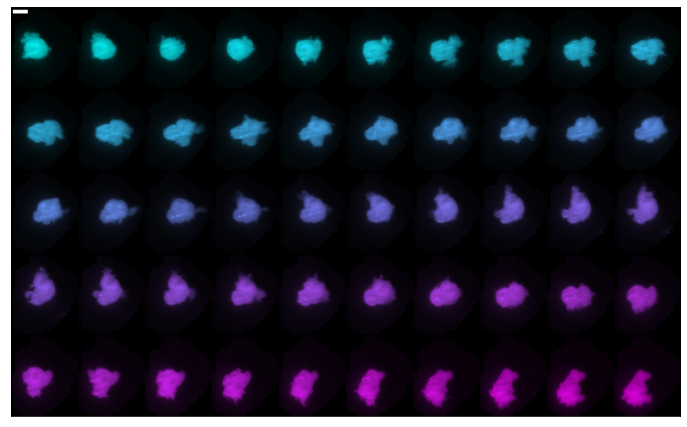

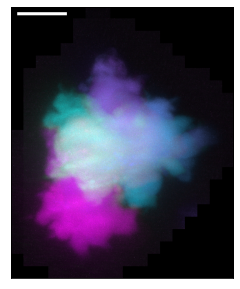

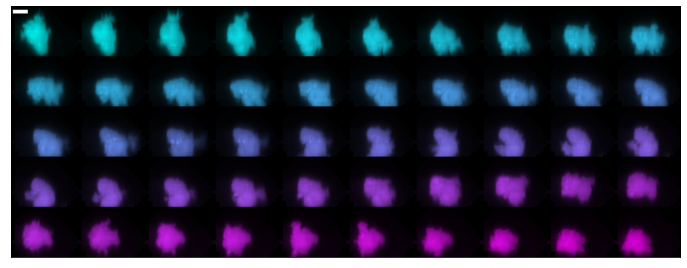

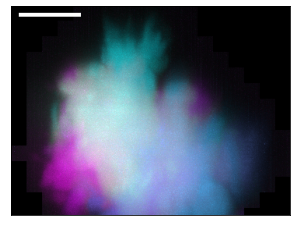

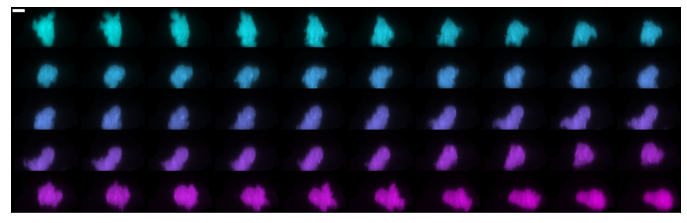

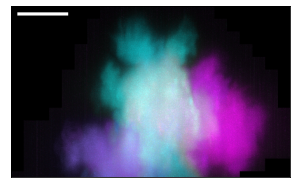

In [9]:
from matplotlib import cm
# [rgbas, mip_rgbas]=hp3d.hp3ddata.inspect_rgbas(hp3ddata_h=l2, groupkey="[G03] stack XY mips before cropping", cmap = cm.get_cmap('cool', 256))
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G03] stack XY mips before cropping", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G04] stack YZ mips before cropping", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G05] stack XZ mips before cropping", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)


scale bars are 8 um
scale bars are 8 um
scale bars are 8 um


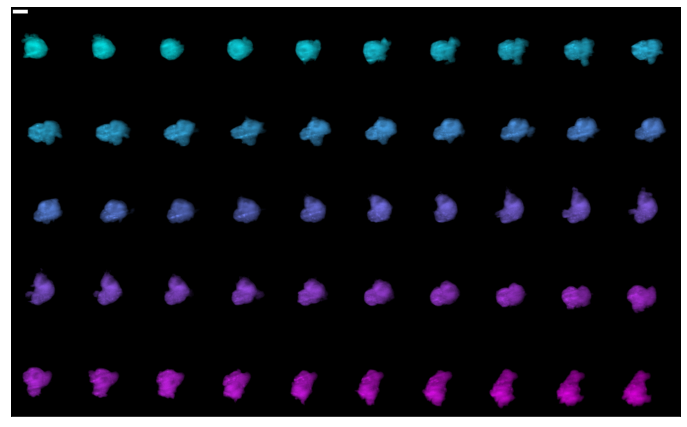

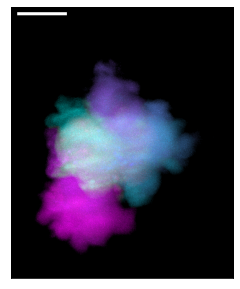

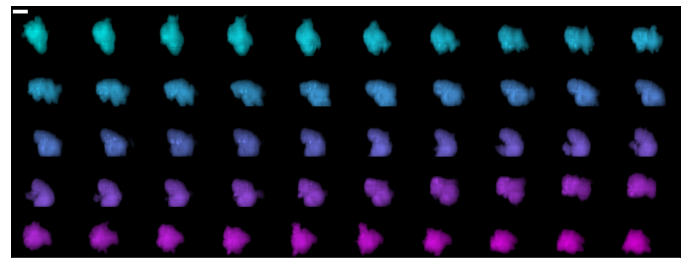

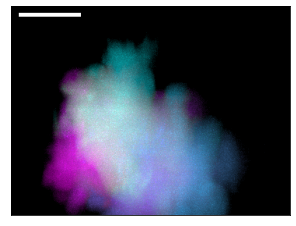

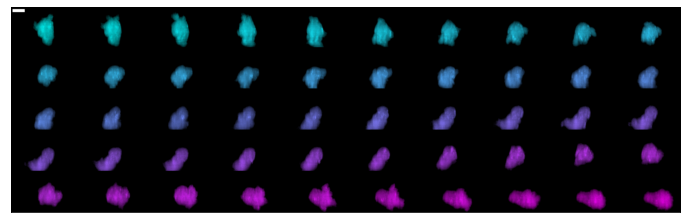

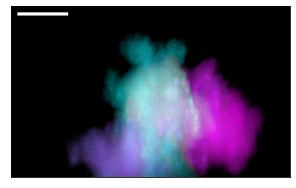

In [10]:
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G06] stack XY mips after cropping - saddle point to upper bound", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G07] stack YZ mips after cropping - saddle point to upper bound", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G08] stack XZ mips after cropping - saddle point to upper bound", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)




# Check the snapshots in time of the dim pheripherals

scale bars are 8 um
scale bars are 8 um
scale bars are 8 um


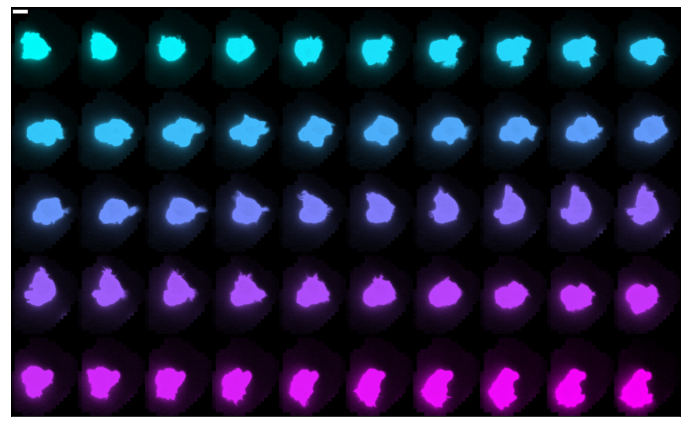

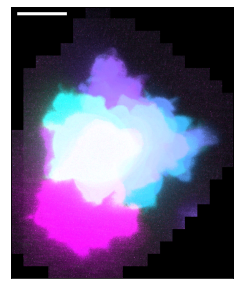

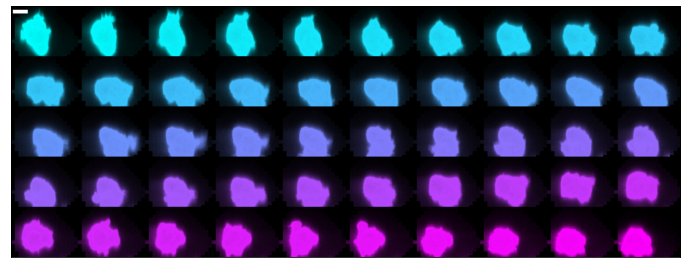

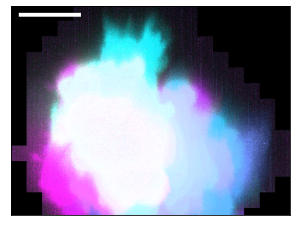

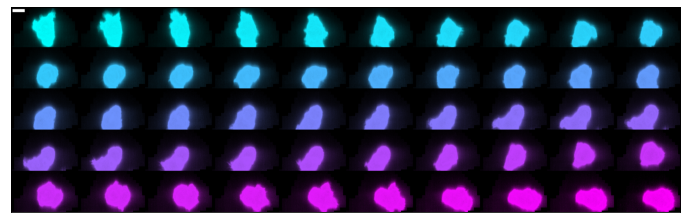

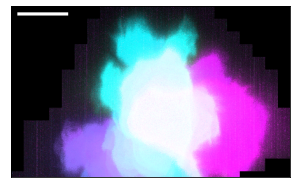

In [11]:
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G09] stack XY mips after cropping - lower bound to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G10] stack YZ mips after cropping - lower bound to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G11] stack XZ mips after cropping - lower bound to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)


scale bars are 8 um
scale bars are 8 um
scale bars are 8 um


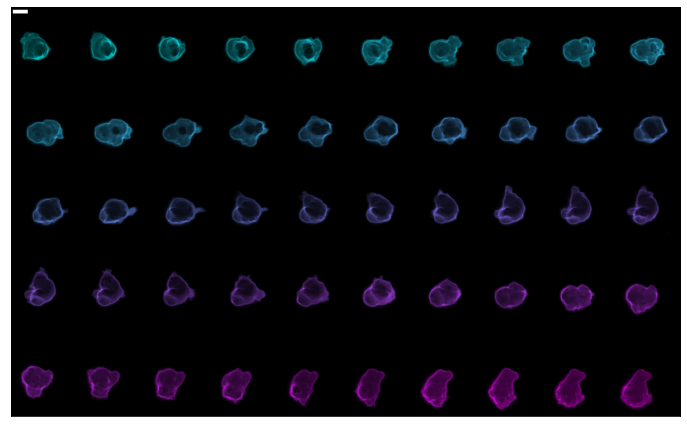

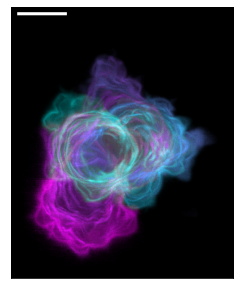

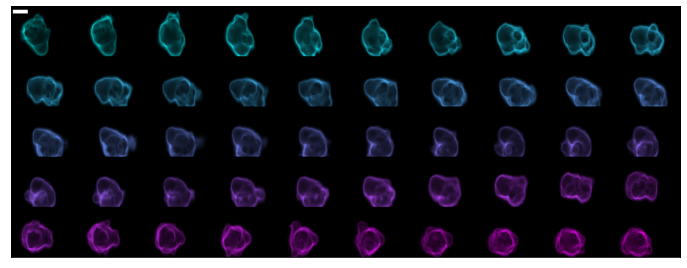

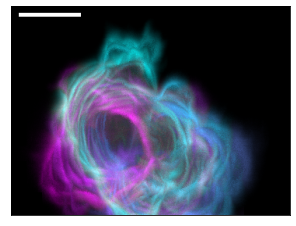

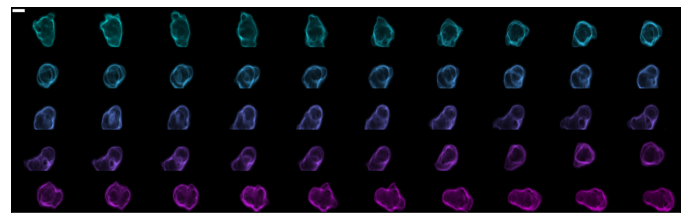

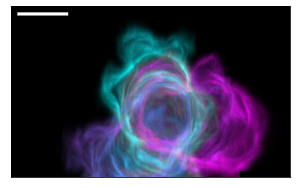

In [12]:
[rgbas0, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G15] stack XY mips after cropping - peripheral lb to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas1, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G16] stack YZ mips after cropping - peripheral lb to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)
[rgbas2, mip_rgbas,tiles_50t]=d.inspect_rgbas(groupkey="[G17] stack XZ mips after cropping - peripheral lb to saddle point", cmap = cm.get_cmap('cool', 256), show_50t_tiles=True)

In [13]:
a0=copy.deepcopy(rgbas0[0])
a1=copy.deepcopy(rgbas1[0])
a2=copy.deepcopy(np.transpose(rgbas2[0],(1,0,2)))
blank=np.zeros([a1.shape[0],a2.shape[1],4]); blank[:,:,3]=1;
a01=np.concatenate([a0,a1],axis=0)
a02=np.concatenate([a2,blank],axis=0)
a012=np.concatenate([a01,a02],axis=1)
a012[:,a0.shape[1],3]=0
a012[a0.shape[0],:,3]=0
a012[15:25,10:90,:]=1

In [14]:
# imgs = [Image.fromarray(img) for img in imgs]
from PIL import Image
imgs=[]
for ind in np.arange(50):
    print('T'+str(ind))
    a0=copy.deepcopy(rgbas0[ind])
    a1=copy.deepcopy(rgbas1[ind])
    a2=copy.deepcopy(np.transpose(rgbas2[ind],(1,0,2)))
    blank=np.zeros([a1.shape[0],a2.shape[1],4]); blank[:,:,3]=1;
    a01=np.concatenate([a0,a1],axis=0)
    a02=np.concatenate([a2,blank],axis=0)
    a012=np.concatenate([a01,a02],axis=1)
    a012[:,a0.shape[1]:a0.shape[1]+1,:]=1
    a012[a0.shape[0]:a0.shape[0]+1,:,:]=1
    a012[15:25,10:90,:]=1
    a=a012*255; a[np.where(a>255)]=255
    imgs.append(Image.fromarray(np.asarray(a,dtype='uint8')))



T0
T1
T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
T30
T31
T32
T33
T34
T35
T36
T37
T38
T39
T40
T41
T42
T43
T44
T45
T46
T47
T48
T49


In [15]:
imgs[0].save("gif2.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)


# gif of XY, XZ, and YZ projection of cell peripherals.



<img src="gif2.gif" width="450" align="left">